## CIFAR 10

In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
from fastai.conv_learner import *
PATH = "data/cifar10/"
os.makedirs(PATH,exist_ok=True)

In [3]:
%pwd

'/home/german/fastai/courses/dl1'

In [4]:
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
stats = (np.array([ 0.4914 ,  0.48216,  0.44653]), np.array([ 0.24703,  0.24349,  0.26159]))

In [5]:
def get_data(sz,bs):
    tfms = tfms_from_stats(stats, sz, aug_tfms=[RandomFlip()], pad=sz//8)
    return ImageClassifierData.from_paths(PATH, val_name='test', tfms=tfms, bs=bs)

In [6]:
bs=128

### Look at data

In [7]:
data = get_data(32,4)

In [8]:
x,y=next(iter(data.trn_dl))

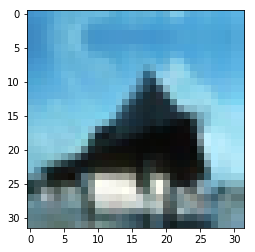

In [9]:
plt.imshow(data.trn_ds.denorm(x)[0]);

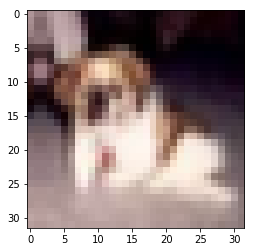

In [10]:
plt.imshow(data.trn_ds.denorm(x)[1]);

## Initial model

In [11]:
from fastai.models.cifar10.resnext import resnext29_8_64

m = resnext29_8_64()
bm = BasicModel(m.cuda(), name='cifar10_rn29_8_64')

In [12]:
data = get_data(8,bs*4)

In [13]:
learn = ConvLearner(data, bm)
learn.unfreeze()

In [14]:
lr=1e-2; wd=5e-4

In [15]:
learn.lr_find()

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                 
    0      3.603189   693690684.6208 0.1       



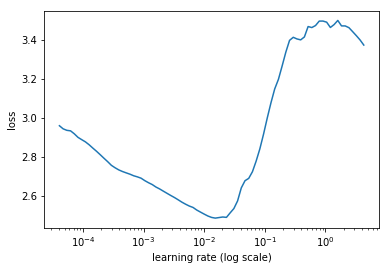

In [16]:
learn.sched.plot()

In [17]:
%time learn.fit(lr, 1)

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                 
    0      1.822476   1.579968   0.4384    

CPU times: user 1min 2s, sys: 27.8 s, total: 1min 30s
Wall time: 1min 14s


[array([1.57997]), 0.43839999995231627]

In [18]:
learn.fit(lr, 2, cycle_len=1)

HBox(children=(IntProgress(value=0, description='Epoch', max=2), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                 
    0      1.519018   1.441954   0.4805    
    1      1.428997   1.378356   0.5058                   



[array([1.37836]), 0.5058000002861023]

In [19]:
learn.fit(lr, 3, cycle_len=1, cycle_mult=2, wds=wd)

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                 
    0      1.361552   1.35202    0.5153    
    1      1.348714   1.329871   0.5171                   
    2      1.224873   1.280023   0.5413                   
    3      1.27962    1.295119   0.5352                   
    4      1.195701   1.255509   0.5544                   
    5      1.086401   1.211091   0.5723                   
    6      1.000805   1.197333   0.577                     



[array([1.19733]), 0.5769999992370606]

In [20]:
learn.save('8x8_8')

## 16x16

In [21]:
learn.load('8x8_8')

In [22]:
learn.set_data(get_data(16,bs*2))

In [23]:
%time learn.fit(1e-3, 1, wds=wd)

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                   
    0      1.524949   1.522204   0.4462    

CPU times: user 40.4 s, sys: 17.8 s, total: 58.2 s
Wall time: 41.9 s


[array([1.5222]), 0.4462]

In [24]:
learn.unfreeze()

In [25]:
learn.lr_find()

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                   
    0      2.338921   972.780259 0.1043    



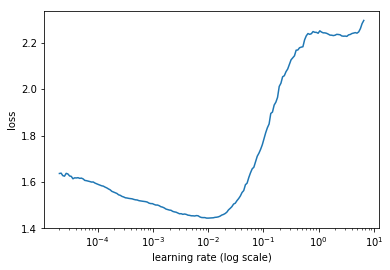

In [26]:
learn.sched.plot()

In [27]:
lr=1e-2

In [28]:
learn.fit(lr, 2, cycle_len=1, wds=wd)

HBox(children=(IntProgress(value=0, description='Epoch', max=2), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                   
    0      1.234326   1.144619   0.5878    
    1      1.072035   1.006014   0.6504                     



[array([1.00601]), 0.6504]

In [29]:
learn.fit(lr, 3, cycle_len=1, cycle_mult=2, wds=wd)

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                    
    0      0.982169   0.921011   0.6771    
    1      0.956464   0.892117   0.6856                      
    2      0.783886   0.792422   0.7238                      
    3      0.861001   1.005804   0.6677                      
    4      0.739891   0.750985   0.7377                      
    5      0.610329   0.671877   0.7669                      
    6      0.546024   0.653901   0.7734                      



[array([0.6539]), 0.7734]

In [30]:
learn.save('16x16_8')

## 24x24

In [31]:
learn.load('16x16_8')

In [32]:
learn.set_data(get_data(24,bs))

In [33]:
learn.fit(1e-2, 1, wds=wd)

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                    
    0      0.676082   0.743319   0.7514    



[array([0.74332]), 0.7514]

In [34]:
learn.unfreeze()

In [35]:
learn.fit(lr, 1, cycle_len=1, wds=wd)

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                    
    0      0.604806   0.57885    0.7994    



[array([0.57885]), 0.7994]

In [36]:
learn.fit(lr, 3, cycle_len=1, cycle_mult=2, wds=wd)

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                    
    0      0.541734   0.525596   0.8205    
    1      0.55532    0.620985   0.7905                      
    2      0.396305   0.447404   0.8457                      
    3      0.524795   0.58102    0.7983                      
    4      0.414114   0.471222   0.8386                      
    5      0.2959     0.394123   0.8686                      
    6      0.234491   0.378835   0.8712                      



[array([0.37884]), 0.8712]

In [37]:
learn.save('24x24_8')

In [39]:
log_preds,y = learn.TTA()
preds = np.mean(np.exp(log_preds),0) 
metrics.log_loss(y,preds), accuracy_np(preds,y)

(0.34641403167010437, 0.8839)

## 32x32

In [40]:
learn.load('24x24_8')

In [41]:
learn.set_data(get_data(32,bs))

In [42]:
learn.fit(1e-2, 1, wds=wd)

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                    
    0      0.311031   0.393611   0.8678    



[array([0.39361]), 0.8678]

In [43]:
learn.unfreeze()

In [44]:
learn.fit(lr, 3, cycle_len=1, cycle_mult=2, wds=wd)

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

  0%|          | 0/391 [00:00<?, ?it/s]


RuntimeError: cuda runtime error (2) : out of memory at /opt/conda/conda-bld/pytorch_1512386481460/work/torch/lib/THC/generic/THCStorage.cu:58

In [ ]:
learn.fit(lr, 3, cycle_len=4, wds=wd)

In [ ]:
log_preds,y = learn.TTA()
metrics.log_loss(y,np.exp(log_preds)), accuracy_np(log_preds,y)

In [ ]:
learn.save('32x32_8')